<a href="https://colab.research.google.com/github/h2k9971/GAN-basic/blob/main/2_%EC%B2%AB_%EB%B2%88%EC%A7%B8_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

In [ ]:
class classifier(nn.Module):

  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.Linear(200,10),
        nn.Sigmoid()
    )
    self.loss_function = nn.MSELoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):

    return self.model(inputs)

  def train(self, inputs, targets):

    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)


    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass

    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim =(0, 1.0), figsize = (16,8), alpha=0.1, marker='.',grid = True
            , yticks=(0, 0.25, 0.5))
    pass


  pass



In [ ]:
class MnistDataset(Dataset):

  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass
  
  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0

    images_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)

    return label, images_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass
    
  pass


In [ ]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/gan/mnist_data/mnist_train.csv')
#mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv

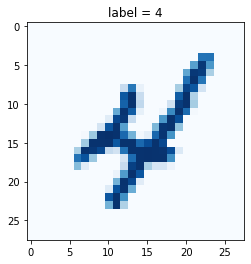

In [ ]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

(5,
 tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0

In [ ]:
%%time
C = classifier()

epochs = 1

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  
  pass

training epoch 1 of 1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
CPU times: user 1min 23s, sys: 82.1 ms, total: 1min 23s
Wall time: 1min 26s


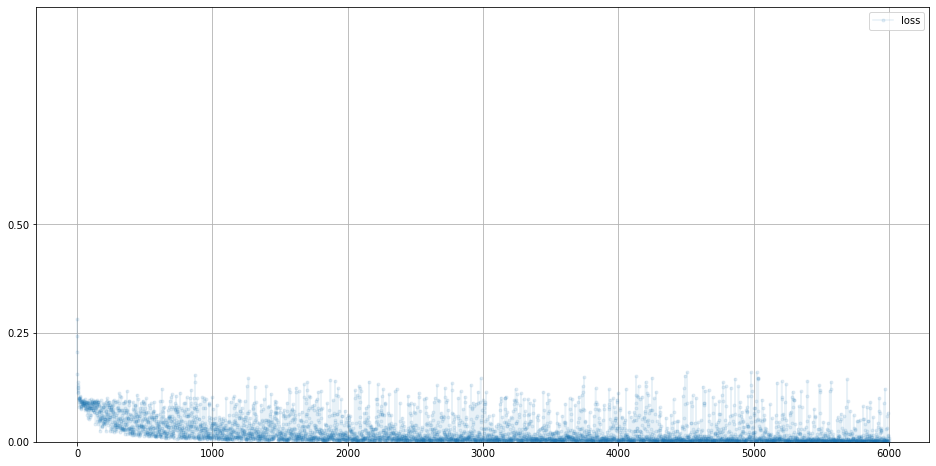

In [ ]:
 C.plot_progress()

In [ ]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/gan/mnist_data/mnist_train.csv')

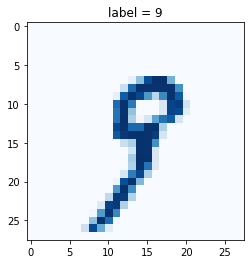

In [ ]:
record = 19

mnist_test_dataset.plot_image(record)

<AxesSubplot:>

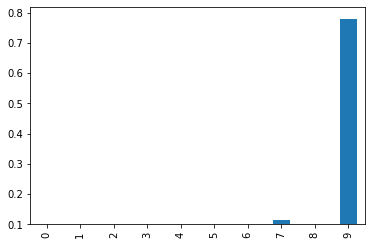

In [ ]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend = False, ylim=(0.1))

In [ ]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)

54385 60000 0.9064166666666666
